Tugas EDA

General Information on the dataset

In [1]:
# Importing Data processing libraries
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

# Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
bank_churn=pd.read_csv('https://raw.githubusercontent.com/alien087/pembelajaran-python-AI/main/bank_churn.csv')

In [4]:
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_churn.shape

(10000, 14)

In [8]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
bank_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
bank_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
bank_churn["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
france = bank_churn.loc[bank_churn['Geography'] == "France"]
spain = bank_churn.loc[bank_churn['Geography'] == "Spain"]
germany = bank_churn.loc[bank_churn['Geography'] == "Germany"]

In [13]:
france.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [14]:
bank_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

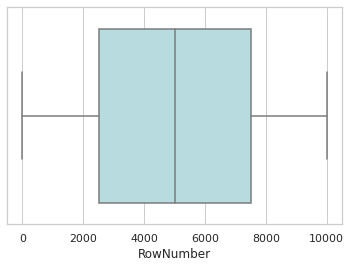

In [16]:
sns.boxplot(x = bank_churn['RowNumber'], color='powderblue')

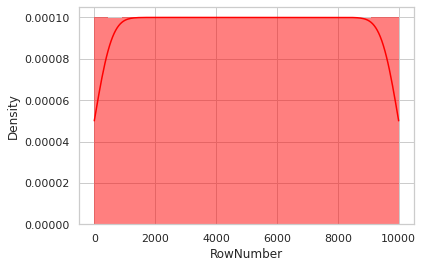

In [17]:
sns.histplot(data=bank_churn['RowNumber'],  color="red", kde=True, stat="density", linewidth=0)

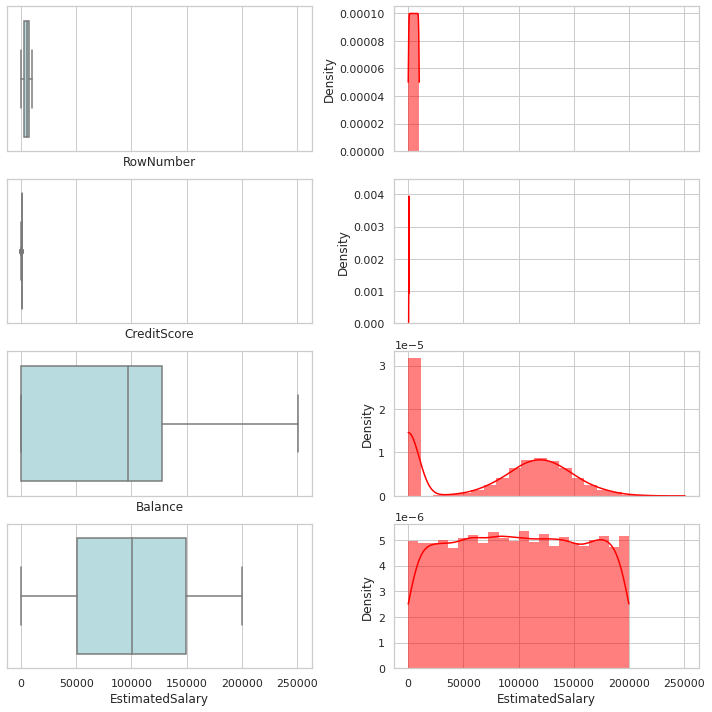

In [18]:
f,axes=plt.subplots(ncols=2, nrows=4, figsize=(10,10), sharex=True)

column=['RowNumber', 'CreditScore', 'Balance', 'EstimatedSalary']
for i in range(4):
    
    #Ploting the boxplot
    sns.boxplot(x = bank_churn[column[i]], ax=axes[i][0], color='powderblue')
    
    # Ploting the KDE
    sns.histplot(data=bank_churn[column[i]], ax=axes[i][1],  color="red", kde=True, stat="density", linewidth=0)  
    
    plt.tight_layout()

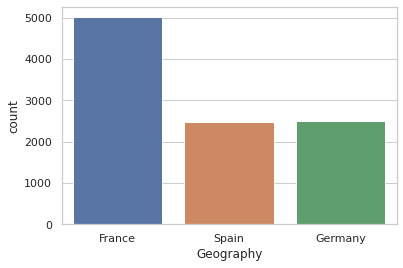

In [19]:
sns.countplot(x=bank_churn['Geography'])

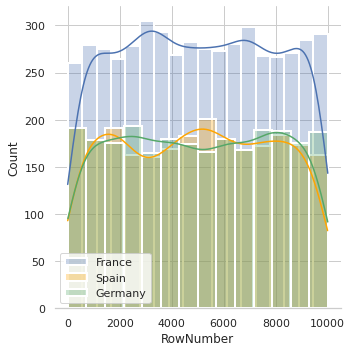

In [20]:
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=france["RowNumber"],label="France",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=spain["RowNumber"],label="Spain",kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=germany["RowNumber"],label="Germany",kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

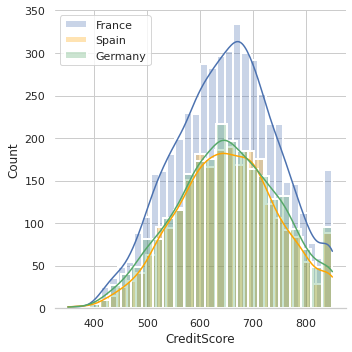

In [21]:
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=france["CreditScore"],label="France",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=spain["CreditScore"],label="Spain",kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=germany["CreditScore"],label="Germany",kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

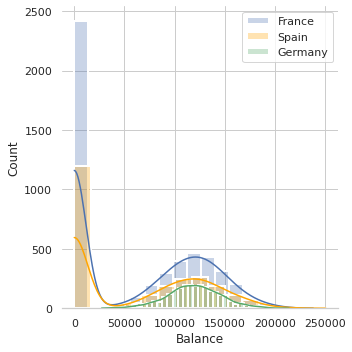

In [22]:
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=france["Balance"],label="France",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=spain["Balance"],label="Spain",kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=germany["Balance"],label="Germany",kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

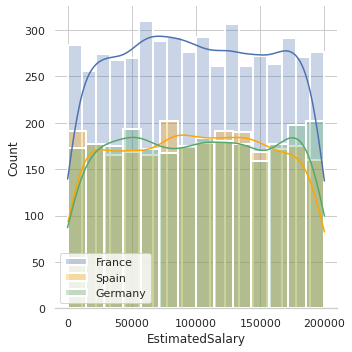

In [23]:
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=france["EstimatedSalary"],label="France",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=spain["EstimatedSalary"],label="Spain",kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=germany["EstimatedSalary"],label="Germany",kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


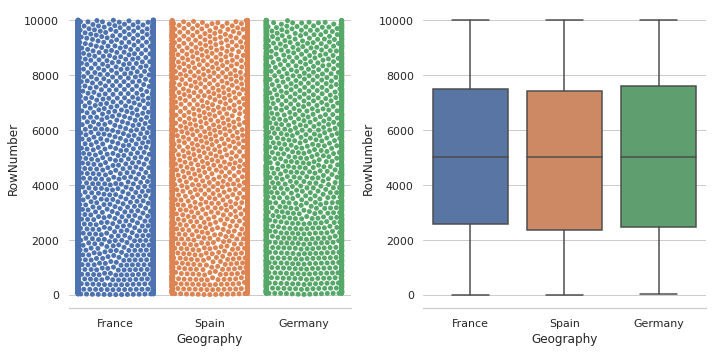

In [24]:
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=bank_churn['Geography'], y=bank_churn['RowNumber'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=bank_churn['Geography'], y=bank_churn['RowNumber'], ax=axes[1])

plt.tight_layout()